In [1]:
import time
import matplotlib.pyplot as plt

# Environments
from environments.ACOEnvironment import ACOEnvironment

# Algorithms
from algorithms.AntColonyOptimization import AntColonyOptimization

# Helper classes
from helpers.PathSpecification import PathSpecification
from helpers.Coordinate import Coordinate

# Ant Colony Optimization

First, we initialize the variables we will be using for the example.

In [2]:
# Please keep your parameters for the environment easily changeable here
width = 40
height = 40
start_pos = Coordinate(2, 2)
end_pos = Coordinate(38, 38)
step_size = 1
obstacles = [(2.5, 0.15), (1.5, 0.02)] # We generate obstacle of radius 2 with frequency 11% and obstacles of radius 1 with frequency 1.8%

In [3]:
# Please keep your parameters for the Genetic Algorithm easily changeable here
population_size = 100
generations = 100
mutation_prob = 0.005
crossover_prob = 0.7
persist_file = "./../data/optimal_tsp"

In [10]:
# Please keep your parameters for the ACO easily changeable here
agents_per_generation = 50
no_generations = 70
q = 500
evaporation = 0.7
trail = 1.0
convergence_iter = 3500
no_change_iter = 30
sigma_elite = 50

Next, we build the environment and other necessary objects. We also print how the environment looks like

Finished preparing the environment


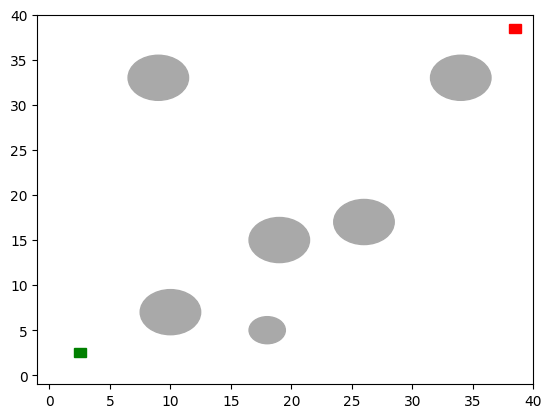

In [5]:
# Construct the optimization objects
environment = ACOEnvironment.create_environment(width, height, obstacles, start_pos=start_pos, end_pos=end_pos)
spec = PathSpecification(start_pos, end_pos)
aco = AntColonyOptimization(environment, agents_per_generation, no_generations, q, evaporation, convergence_iter, no_change_iter, trail, sigma_elite, step_size, num_processes=6)

# Show the environment in matplotlib
environment.visualize_environment()

Next, we run the ACO algorithm and print the results.

Started ACO
Generation 0
Routes found so far: 30
Best route's length: 436


Generation 1
Routes found so far: 30
Best route's length: 372


Generation 2
Routes found so far: 30
Best route's length: 295


Generation 3
Routes found so far: 30
Best route's length: 295


Generation 4
Routes found so far: 30
Best route's length: 177


Generation 5
Routes found so far: 30
Best route's length: 177


Generation 6
Routes found so far: 30
Best route's length: 177


Generation 7
Routes found so far: 30
Best route's length: 177


Generation 8
Routes found so far: 30
Best route's length: 177


Generation 9
Routes found so far: 30
Best route's length: 177


Generation 10
Routes found so far: 30
Best route's length: 177


Generation 11
Routes found so far: 30
Best route's length: 177


Generation 12
Routes found so far: 30
Best route's length: 177


Generation 13
Routes found so far: 30
Best route's length: 177


Generation 14
Routes found so far: 30
Best route's length: 177


Generation 15
Routes fo

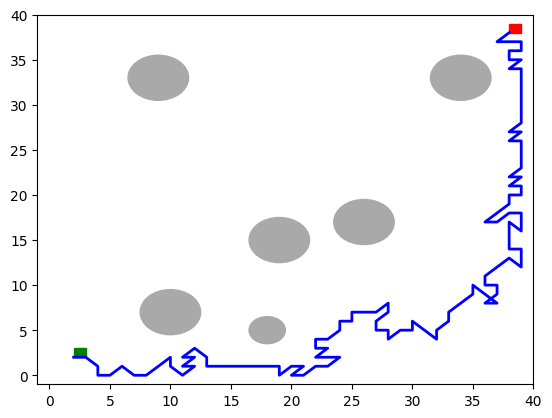

In [11]:
# Save starting time
start_time = int(round(time.time() * 1000))

print("Started ACO")

# Run optimization
shortest_route, checkpoints = aco.find_shortest_route(spec, print_progress=True)

# Print time taken
print("Time taken: " + str((int(round(time.time() * 1000)) - start_time) / 1000.0))

# Save solution
# shortest_route.write_to_file("./../data/hard_solution.txt")

# Print route size
print("Route size: " + str(shortest_route.size()))

# Print route path
environment.visualize_environment(shortest_route)

#### Parameter tuning

Now, we will start tuning several hyperparameters for our ACO Algorithm. Specifically, we will be tuning the q value.

In [7]:
agents_per_generation = 15
no_generations = 20
evaporation = 0.1
trail = 1.0
convergence_iter = 100
no_change_iter = 20
sigma_elite = 5

environment = ACOEnvironment.create_environment(width, height, start_pos, end_pos, obstacles)
spec = PathSpecification.read_coordinates(start_pos, end_pos)
distances = []
q_list = [1, 10, 100, 500, 1000]

for q in q_list:
    shortest_route = 0
    aco = AntColonyOptimization(environment, agents_per_generation, no_generations, q, evaporation, convergence_iter, no_change_iter, trail, sigma_elite, num_processes=6)
    for i in range(10):
        route, checkpoints = aco.find_shortest_route(spec)
        shortest_route += route.size()
    distances.append(shortest_route / 10)

plt.plot(q_list, distances)
plt.xlabel("Q values")
plt.ylabel("Route size")
plt.title("Q value versus route size")
plt.show()

Finished preparing the board
Generation 0
Routes found so far: 0


Generation 1
Routes found so far: 0


Generation 2
Routes found so far: 0


Generation 3
Routes found so far: 0


Generation 4
Routes found so far: 0


Generation 5
Routes found so far: 0


Generation 6
Routes found so far: 0


Generation 7
Routes found so far: 0


Generation 8
Routes found so far: 0


Generation 9
Routes found so far: 0


Generation 10
Routes found so far: 0


Generation 11
Routes found so far: 0


Generation 12
Routes found so far: 0


Generation 13
Routes found so far: 0


Generation 14
Routes found so far: 0


Generation 15
Routes found so far: 0


Generation 16
Routes found so far: 0


Generation 17
Routes found so far: 0


Generation 18
Routes found so far: 0


Generation 19
Routes found so far: 0


AttributeError: 'NoneType' object has no attribute 'size'

#### Speed of convergence (generations) of the grading environments

Finished preparing the board
Generation 0
Routes found so far: 20
Best route's length: 322


Generation 1
Routes found so far: 20
Best route's length: 316


Generation 2
Routes found so far: 20
Best route's length: 238


Generation 3
Routes found so far: 20
Best route's length: 238


Generation 4
Routes found so far: 20
Best route's length: 212


Generation 5
Routes found so far: 20
Best route's length: 212


Generation 6
Routes found so far: 20
Best route's length: 212


Generation 7
Routes found so far: 20
Best route's length: 120


Generation 8
Routes found so far: 20
Best route's length: 120


Generation 9
Routes found so far: 20
Best route's length: 120


Generation 10
Routes found so far: 20
Best route's length: 120


Generation 11
Routes found so far: 20
Best route's length: 120


Generation 12
Routes found so far: 20
Best route's length: 120


Generation 13
Routes found so far: 20
Best route's length: 120


Generation 14
Routes found so far: 20
Best route's length: 120


Genera

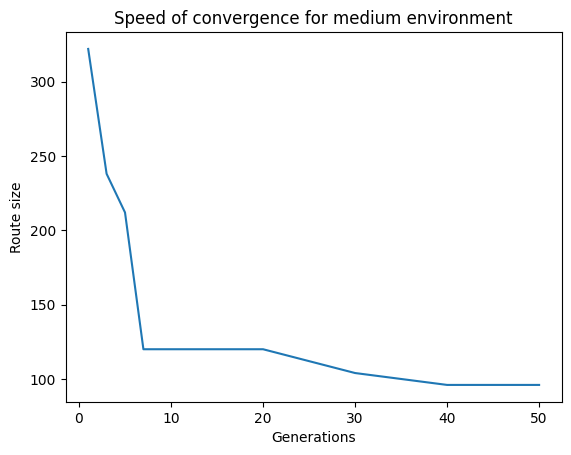

In [8]:
agents_per_generation = 20
no_generations = 50
q = 200
evaporation = 0.2
trail = 1.0
convergence_iter = 10000
no_change_iter = 50
sigma_elite = 50

environment = ACOEnvironment.create_environment(width, height, start_pos, end_pos, obstacles)
spec = PathSpecification.read_coordinates(start_pos, end_pos)
aco = AntColonyOptimization(environment, agents_per_generation, no_generations, q, evaporation, convergence_iter, no_change_iter, trail, sigma_elite, num_processes=6)
shortest_route, checkpoints = aco.find_shortest_route(spec)



plt.plot([1, 3, 5, 7, 10, 20, 30, 40, 50], checkpoints)
plt.xlabel("Generations")
plt.ylabel("Route size")
plt.title("Speed of convergence for medium environment")
plt.show()